<a href="https://colab.research.google.com/github/LiamB333/GWO-LSTM/blob/main/GWO_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from pylab import rcParams
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install pandas-ta
import pandas_ta as ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=2e459fa6c8c8bc75e2e77dd015bef3cc92e220cc83aeb25af3df2d14582afdb2
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

seedrandom = 1

# np.random.seed(seed)
# tf.random.set_seed(seed)

from numpy.random import seed
seed(seedrandom)
tf.random.set_seed(seedrandom)

In [ ]:
dep_var = "Close"
ticker = "BTC-USD"

start_date = '2015-06-21'
drop_columns = ["Adj Close","Close"]

### Get TCK history (request)

In [ ]:
# Fetch data by sending a request
tck = yf.Ticker(ticker)

# Start and End Date
tck_hist = yf.download(ticker,'2015-06-21','2021-09-01',interval="1d")

# Save dependent variable data in csv file
tck_hist.to_csv(ticker+".csv")

print(tck_hist.tail())

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-08-27  46894.554688  49112.785156  46394.281250  49058.667969   
2021-08-28  49072.585938  49283.503906  48499.238281  48902.402344   
2021-08-29  48911.250000  49644.113281  47925.855469  48829.832031   
2021-08-30  48834.851562  48925.605469  46950.273438  47054.984375   
2021-08-31  47024.339844  48189.550781  46750.093750  47166.687500   

               Adj Close       Volume  
Date                                   
2021-08-27  49058.667969  34511076995  
2021-08-28  48902.402344  28568103401  
2021-08-29  48829.832031  25889650240  
2021-08-30  47054.984375  31847007016  
2021-08-31  47166.687500  34730363427  


### Get TCK history (from saved csv file)

In [ ]:
# Get data from saved file
tck_hist = pd.read_csv(ticker+'.csv', header=0) # header is frist row
tck_hist['Date'] = pd.to_datetime(tck_hist['Date'])
tck_hist = tck_hist.set_index('Date')

In [ ]:
tck_adj_close_hist = tck_hist[dep_var]

In [ ]:
tck_adj_close_hist.tail()
print(tck_adj_close_hist.index)

DatetimeIndex(['2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24',
               '2015-06-25', '2015-06-26', '2015-06-27', '2015-06-28',
               '2015-06-29', '2015-06-30',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='Date', length=2264, freq=None)


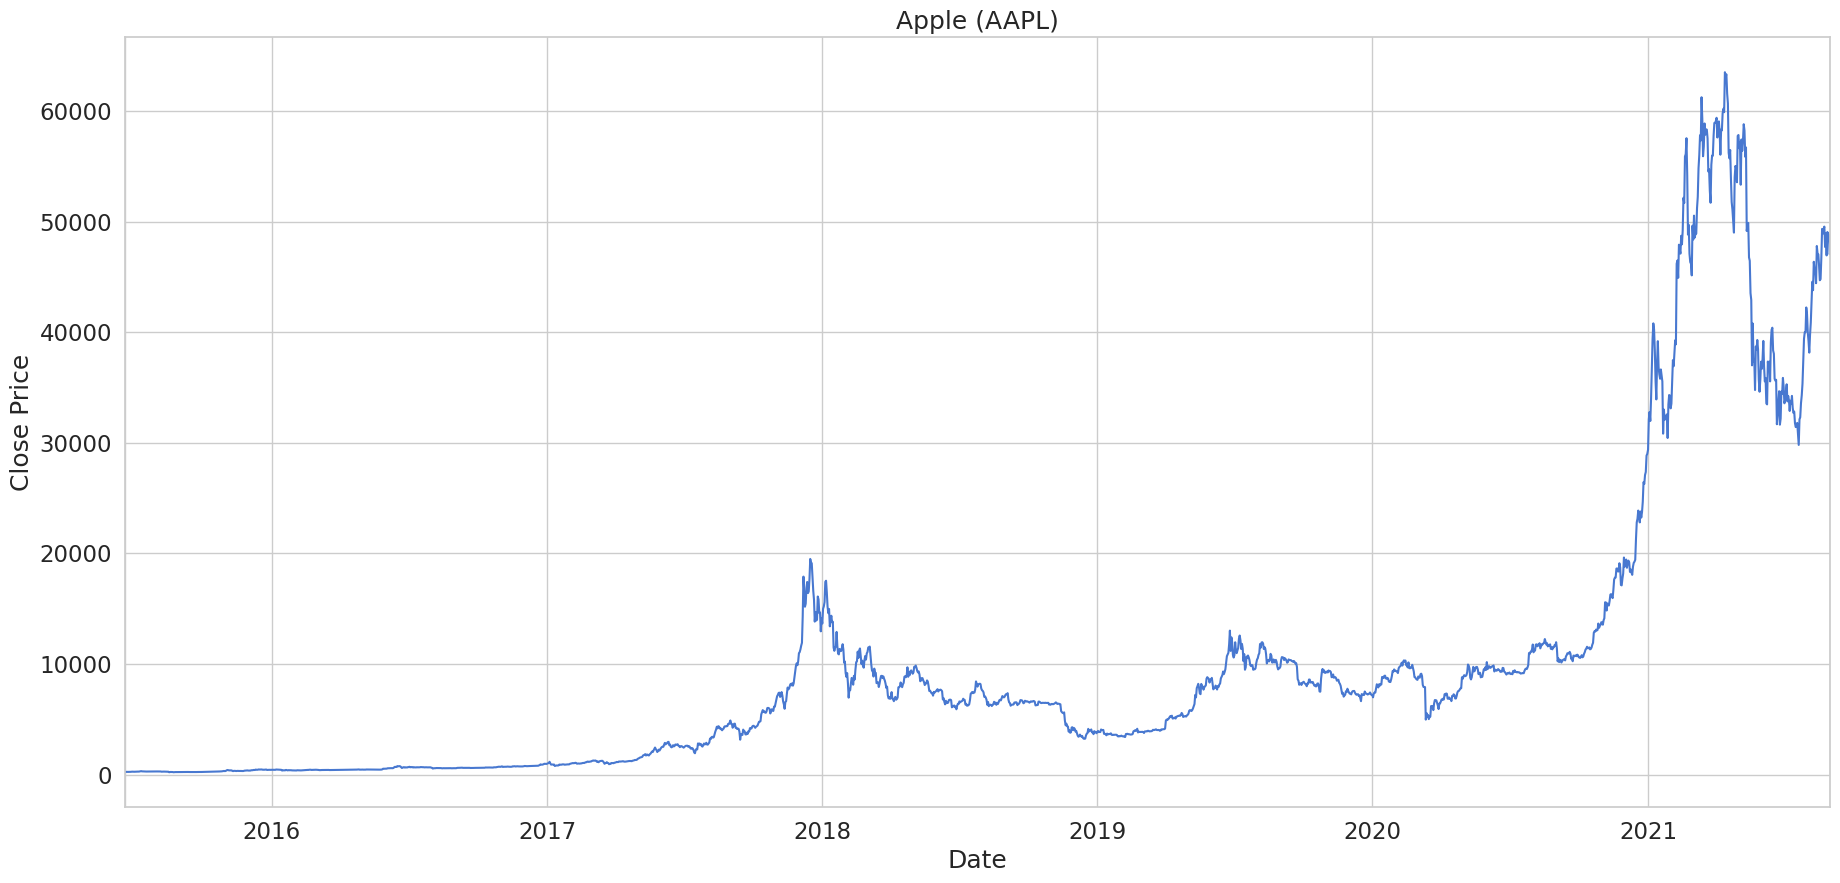

In [ ]:
tck_adj_close_hist.plot()

# Add a title to the plot
plt.title('Apple (AAPL)')

# Adding a label on the left for the price
plt.ylabel('Close Price')

# Show the plot
plt.show()


In [ ]:
df = pd.DataFrame(tck_hist)
print(df)

                    Open          High           Low         Close  \
Date                                                                 
2015-06-21    245.100006    245.223999    241.882004    243.944000   
2015-06-22    243.968994    247.917007    243.779007    246.990005   
2015-06-23    246.927002    247.304001    243.132996    244.296005   
2015-06-24    244.281998    244.341003    240.514999    240.514999   
2015-06-25    240.365005    243.332001    240.365005    242.798996   
...                  ...           ...           ...           ...   
2021-08-27  46894.554688  49112.785156  46394.281250  49058.667969   
2021-08-28  49072.585938  49283.503906  48499.238281  48902.402344   
2021-08-29  48911.250000  49644.113281  47925.855469  48829.832031   
2021-08-30  48834.851562  48925.605469  46950.273438  47054.984375   
2021-08-31  47024.339844  48189.550781  46750.093750  47166.687500   

               Adj Close       Volume  
Date                                   
2015-06-2

#### truncate to dates when tck is in existance

In [ ]:
df = df.loc[start_date:]

df.dropna(inplace=True)

print(df)

                    Open          High           Low         Close  \
Date                                                                 
2015-06-21    245.100006    245.223999    241.882004    243.944000   
2015-06-22    243.968994    247.917007    243.779007    246.990005   
2015-06-23    246.927002    247.304001    243.132996    244.296005   
2015-06-24    244.281998    244.341003    240.514999    240.514999   
2015-06-25    240.365005    243.332001    240.365005    242.798996   
...                  ...           ...           ...           ...   
2021-08-27  46894.554688  49112.785156  46394.281250  49058.667969   
2021-08-28  49072.585938  49283.503906  48499.238281  48902.402344   
2021-08-29  48911.250000  49644.113281  47925.855469  48829.832031   
2021-08-30  48834.851562  48925.605469  46950.273438  47054.984375   
2021-08-31  47024.339844  48189.550781  46750.093750  47166.687500   

               Adj Close       Volume  
Date                                   
2015-06-2

### Adding Indicators

In [ ]:
data = df
# Moving Average Convergence Divergence: macd
data.ta.macd(close=data['Close'], append=True)
# Relative Strength Index: rsi
data.ta.rsi(close=data['Close'], append=True)
# Momentum: mom
data.ta.mom(close=data['Close'], append=True)
# Bollinger Bands: BB
data.ta.bbands(close=data['Close'], append=True)
# Relative Volatility Index: rvi
data.ta.rvi(close=data['Close'], append=True)
# Exponential Moving Average: ema
data.ta.ema(close=data['Close'], append=True)
# Simple Moving Average: sma
data.ta.sma(close=data['Close'], append=True)
# Stochastic : stoch
data.ta.stoch(close=data['Close'], append=True)
# True strength index: tsi
data.ta.tsi(close=data['Close'], append=True)
# Weighted Moving Average: wma
data.ta.wma(close=data['Close'], append=True)
# Triple Exponential Moving Average: tema
data.ta.tema(close=data['Close'], append=True)
# Commodity Channel Index: cci
data.ta.cci(close=data['Close'], append=True)
# Ease of movement : eom
data.ta.eom(close=data['Close'], append=True)
# Chaikin Money Flow : cmf
data.ta.cmf(close=data['Close'], append=True)
# Rate of Change : roc
data.ta.roc(close=data['Close'], append=True)

df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [ ]:
df = data

print("Shape BEFORE: ",df.shape)

df = df.iloc[52:] #52

df.to_csv("test.csv")

print("Shape AFTER: ",df.shape)

df.to_csv('data.csv', index=False)

Shape BEFORE:  (2264, 29)
Shape AFTER:  (2212, 29)


In [ ]:
features = df.columns

## Modeling

In [ ]:
# 90% training and 10% test
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size

# Make a copy to ensure the original dataset remains unchanged when scaling
df_copy = df.copy()
train, test = df_copy.iloc[0:train_size], df_copy.iloc[train_size:len(df)]
print(len(train), len(test))

1990 222


#### Train Test Split

In [ ]:
# Scale all data
tck_transformer = MinMaxScaler()
train[dep_var] = tck_transformer.fit_transform(train[dep_var].values.reshape(-1,1))
test[dep_var] = tck_transformer.transform(test[dep_var].values.reshape(-1,1))

feature_transformer = MinMaxScaler()
train[features] = feature_transformer.fit_transform(train[features].values)
test[features] = feature_transformer.transform(test[features].values)

print(train[features].shape)
print(test[features].shape)

train[features].to_csv("X_train.csv")
train[dep_var].to_csv("y_train.csv")
test[features].to_csv("X_test.csv")
test[dep_var].to_csv("y_test.csv")

(1990, 29)
(222, 29)


<ipython-input-15-6d03792fc098>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[dep_var] = tck_transformer.fit_transform(train[dep_var].values.reshape(-1,1))
<ipython-input-15-6d03792fc098>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[dep_var] = tck_transformer.transform(test[dep_var].values.reshape(-1,1))
<ipython-input-15-6d03792fc098>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

#### Create dataset with Lag for LSTM

In [ ]:
# Adjust the y values to be the time_step amount ahead of each row
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        end_ix = i + time_steps
        v = X.iloc[i:end_ix].values
        Xs.append(v)
        ys.append(y.iloc[end_ix])
    return np.array(Xs), np.array(ys)

In [ ]:
# Prepare the data for LSTM
time_steps = 10
X_train, y_train = create_dataset(train, train[dep_var], time_steps)
X_test, y_test = create_dataset(test, test[dep_var], time_steps)

X_train.shape

(1980, 10, 29)

Epoch 1/50
51/51 [==============================] - 3s 13ms/step - loss: 0.0767 - val_loss: 0.0678
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0439
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0381
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0333
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0204
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0217
Epoch 7/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0261
Epoch 8/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0159
Epoch 9/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0146
Epoch 10/50
51/51 [==============================] - 0s 5ms/step - loss: 9.4568e-04 - val_loss: 0.0209
Epoch 11/50
51

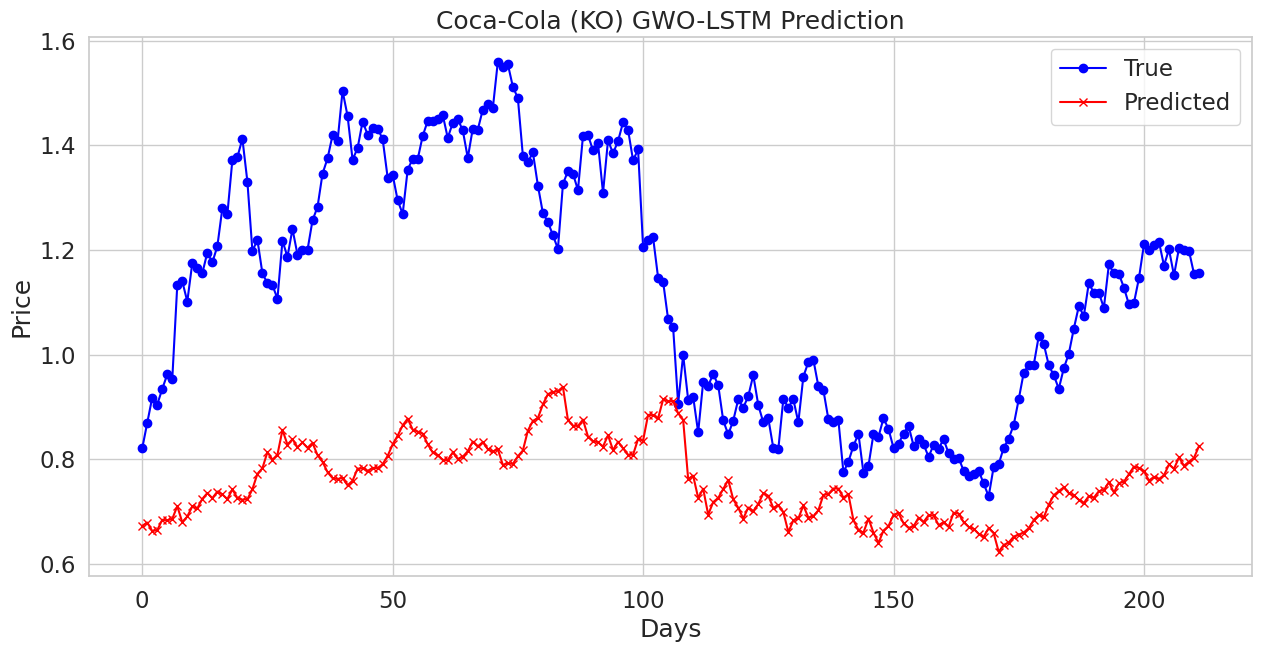

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = Sequential([
    LSTM(100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.8),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=35, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Prediction
predictions = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

import matplotlib.pyplot as plt

# Plot real values against prediction
plt.figure(figsize=(15, 7))
plt.plot(y_test.flatten(), label='True', color='blue', marker='o')
plt.plot(predictions.flatten(), label='Predicted', color='red', marker='x')
plt.title('Coca-Cola (KO) GWO-LSTM Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
#plt.figure(figsize=(10, 5))
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Training Vs. Validation Loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()


In [ ]:
import numpy as np
import logging, pickle, os, time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Dropout
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Objective function to optimise
def objective_function(hp):
    try:
        model = Sequential()
        model.add(LSTM(units=int(hp[0]), input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(hp[3]))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

        model.fit(X_train, y_train, epochs=int(hp[1]), batch_size=int(hp[2]), verbose=1)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        return mse

    except Exception as e:
        print(f"An error occurred during training: {e}")
        return np.inf

class GWO:
    def __init__(self, population_size, max_iter, dimension, lower_bound, upper_bound):
        self.population_size = population_size
        self.max_iter = max_iter
        self.dimension = dimension
        self.lower_bound = np.array(lower_bound)
        self.upper_bound = np.array(upper_bound)
        self.alpha_pos = np.zeros(dimension)
        self.alpha_score = float('inf')
        self.beta_pos = np.zeros(dimension)
        self.beta_score = float('inf')
        self.delta_pos = np.zeros(dimension)
        self.delta_score = float('inf')
        self.positions = np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=(population_size, dimension))

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.population_size):
                fitness = objective_function(self.positions[i])

                # Update Alpha, Beta, Delta rankings
                if fitness < self.alpha_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy()
                    self.beta_score = self.alpha_score
                    self.beta_pos = self.alpha_pos.copy()
                    self.alpha_score = fitness
                    self.alpha_pos = self.positions[i].copy()
                elif fitness < self.beta_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy()
                    self.beta_score = fitness
                    self.beta_pos = self.positions[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.positions[i].copy()

            a = 2 - iteration * (2 / self.max_iter)  # Linear decrease of 'a'

            # Update the positions of all search agents
            for i in range(self.population_size):
                for j in range(self.dimension):
                    r1, r2 = np.random.rand(2)
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    # Influence calculations
                    D_alpha = abs(C1 * self.alpha_pos[j] - self.positions[i][j])
                    D_beta = abs(C2 * self.beta_pos[j] - self.positions[i][j])
                    D_delta = abs(C3 * self.delta_pos[j] - self.positions[i][j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha
                    X2 = self.beta_pos[j] - A2 * D_beta
                    X3 = self.delta_pos[j] - A3 * D_delta
                    self.positions[i][j] = (X1 + X2 + X3) / 3

                self.positions[i] = np.clip(self.positions[i], self.lower_bound, self.upper_bound)  # Clipping after all dims updated

            # Save the best solution every 2 iterations
            if (iteration + 1) % 2 == 0:
                save_best_solution(self.alpha_pos, self.alpha_score)

        # Save the final best solution
        save_best_solution(self.alpha_pos, self.alpha_score)

        return self.alpha_pos, self.alpha_score

# Function to save the best solution
def save_best_solution(best_pos, best_score, filename='best_solution.pkl'):
    solution_data = {
        'best_pos': best_pos,
        'best_score': best_score
    }

    with open(filename, 'wb') as f:
        pickle.dump(solution_data, f)

# Running the optimiser
gwo = GWO(population_size=15, max_iter=30, dimension=4, lower_bound=[10, 10, 10, 0], upper_bound=[120, 70, 120, 1])
best_hyperparameters, best_score = gwo.optimize()

# Correctly print out the optimized hyperparameters and the best score
print(f"Optimized hyperparameters: Units={int(best_hyperparameters[0])}, Epochs={int(best_hyperparameters[1])}, Batch size={int(best_hyperparameters[2])}, Dropout={best_hyperparameters[3]}")
print(f"Best objective function value: {best_score:.6f}")

# Load the best solution if it exists
if os.path.exists('best_solution.pkl'):
    with open('best_solution.pkl', 'rb') as f:
        solution_data = pickle.load(f)

    best_pos = solution_data['best_pos']
    best_score = solution_data['best_score']

    print(f"Optimized hyperparameters: Units={int(best_hyperparameters[0])}, Epochs={int(best_hyperparameters[1])}, Batch size={int(best_hyperparameters[2])}, Dropout={best_hyperparameters[3]}")
    print(f"Best objective function value: {best_score:.6f}")
else:
    print("No best solution found.")

Streaming output truncated to the last 5000 lines.
95/95 [==============================] - 1s 6ms/step - loss: 2.7193e-04
Epoch 10/22
95/95 [==============================] - 1s 6ms/step - loss: 2.6999e-04
Epoch 11/22
95/95 [==============================] - 1s 6ms/step - loss: 2.7266e-04
Epoch 12/22
95/95 [==============================] - 1s 6ms/step - loss: 2.3993e-04
Epoch 13/22
95/95 [==============================] - 1s 5ms/step - loss: 2.6510e-04
Epoch 14/22
95/95 [==============================] - 1s 6ms/step - loss: 2.9111e-04
Epoch 15/22
95/95 [==============================] - 1s 6ms/step - loss: 2.9858e-04
Epoch 16/22
95/95 [==============================] - 1s 6ms/step - loss: 2.0786e-04
Epoch 17/22
95/95 [==============================] - 1s 6ms/step - loss: 2.8313e-04
Epoch 18/22
95/95 [==============================] - 1s 5ms/step - loss: 2.2024e-04
Epoch 19/22
95/95 [==============================] - 1s 6ms/step - loss: 2.4094e-04
Epoch 20/22
95/95 [==================

KeyboardInterrupt: 

In [ ]:
# Load the pickle file
with open('best_solution.pkl', 'rb') as f:
    your_object = pickle.load(f)

# Convert to a DataFrame
df = pd.DataFrame(your_object)

# Save as CSV
df.to_csv('your_file.csv', index=False)
